<a href="https://colab.research.google.com/github/Leerish/Deep-Learning-Notebooks/blob/main/Timeseries_Forecast_Bitcoin_prediction_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting fundamentalsnwith Tensorflow + Milestone Project 3: BitPredict 💰📈

Links:
* https://github.com/mrdbourke/tensorflow-deep-learning

Use Tensorflow to predict the price of bitcoin based on historical price of bitcoin

## Data

Data using in this section is from here https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-12-16 07:43:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-12-16 07:43:14 (6.96 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series data with pandas

In [ ]:
import pandas as pd

# Read in our bitcoin data and parse dates
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" ,
                 parse_dates =["Date"],
                 index_col=["Date"]) # Parse Date Column and tell pandas column 1 is a datetime

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
# How many samples
len(df)

2787

We've collected the historical price of Bitcoin for the past ~8 years but there's only 2787 samples

Typically Deep Learning model usually like lots and lots of samples more than 10,000 for better predictions

smaller number of samples is something you'll often run with time series problems

>**Note:** The **seasonality** of a time series dataset is reffered as the number of samples per year .So for our Bitcoin Data , it has been it has a seasonality of daily value of 365 because we collect one sample per day meaning we'll get 365 samples per year

In [ ]:
# We only want closing price for each each day

bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


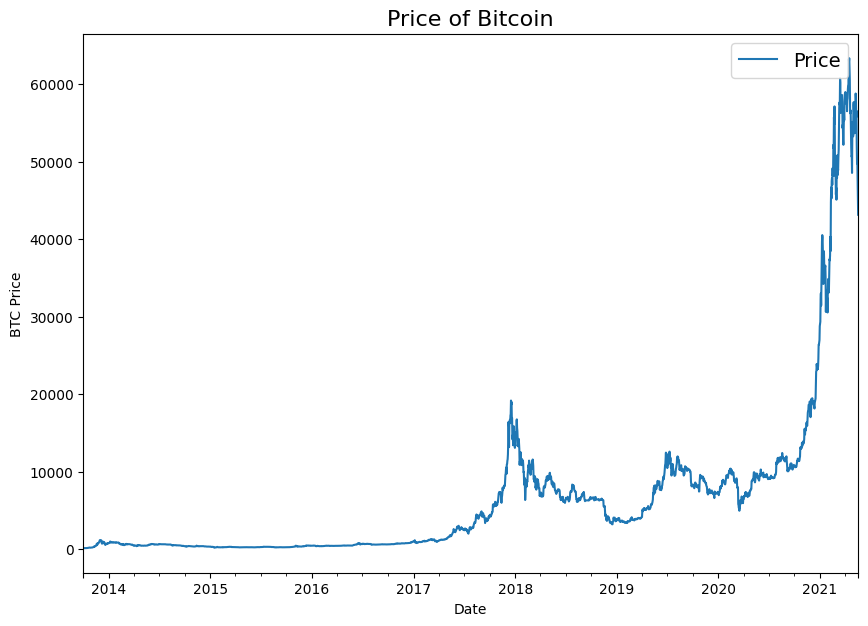

In [ ]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin" , fontsize = 16)
plt.legend(fontsize=14);

## Importing time series data with Python's CSV module


In [ ]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" , "r") as f:
  csv_reader =csv.reader(f , delimiter=",")
  next(csv_reader) #Skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d")) # Get dates as dates not strings
    btc_price.append(float(line[2])) # get Closing price as float

# View first 10 of each
timesteps[:10] , btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

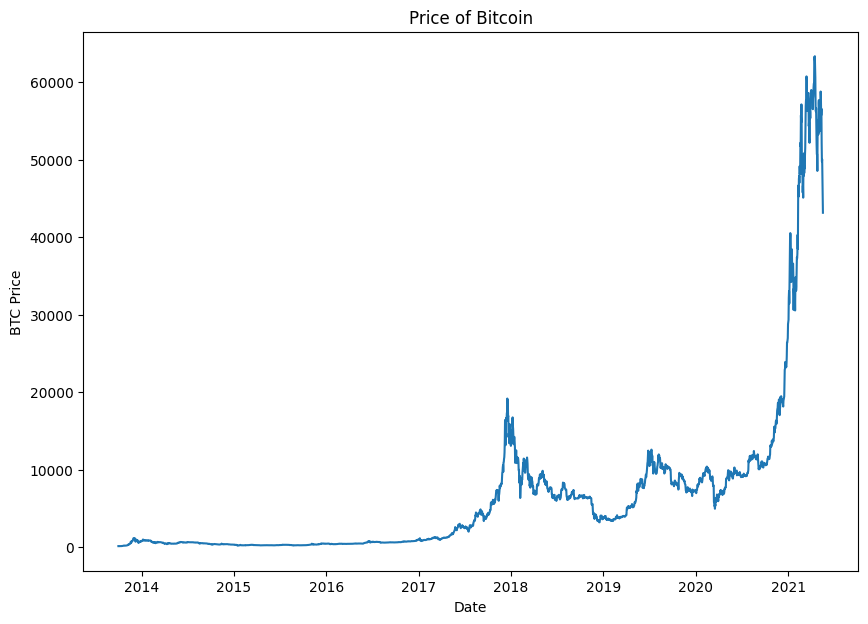

In [ ]:
# Plot from CSV

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10 ,7))
plt.plot(timesteps , btc_price)
plt.title("Price of Bitcoin")
plt.ylabel("BTC Price")
plt.xlabel("Date");

### Format Data 1: Create train and test sets of our data

In [ ]:
# Get Bitcoin date array

timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10] , prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

### Wrong way to make train/test sets for time series data

In [ ]:


from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(timesteps, # Dates
                                                       prices, # BTC Prices
                                                       test_size = 0.2,
                                                       random_state = 42)

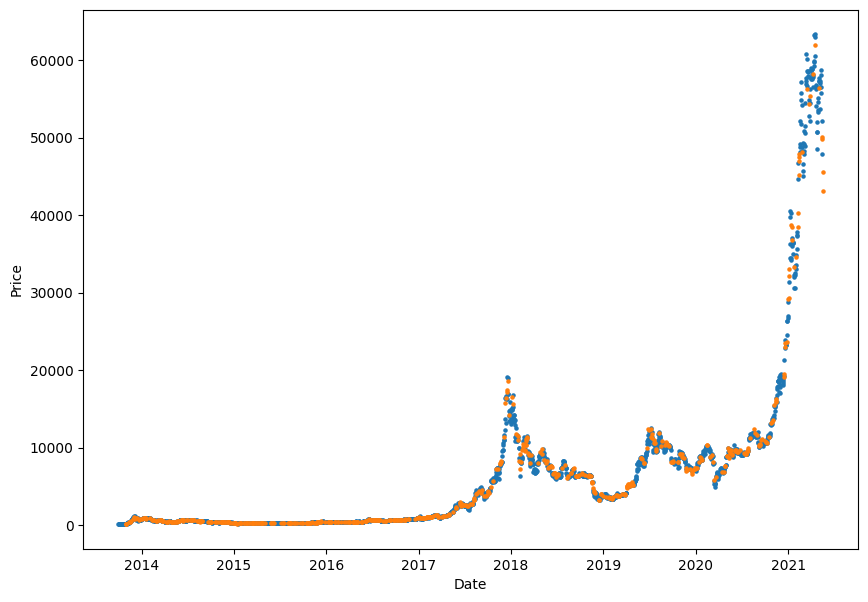

In [ ]:
# Let's plot wrong data sets
plt.figure(figsize=(10,7))
plt.scatter(x_train , y_train , s = 5 , label="Train Data")
plt.scatter(x_test , y_test , s = 5 , label="Test Data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

### Create train and test for time series (Right Way)

In [ ]:
# Create train and test splits the right way

split_size = int(0.8*len(prices)) # 80 % train , 20% test

# Create train data splits (Everything before split)

x_train , y_train = timesteps[:split_size] , prices[:split_size]

# Create test data splits (Everything after split)
x_test , y_test = timesteps[split_size:] , prices[split_size:]


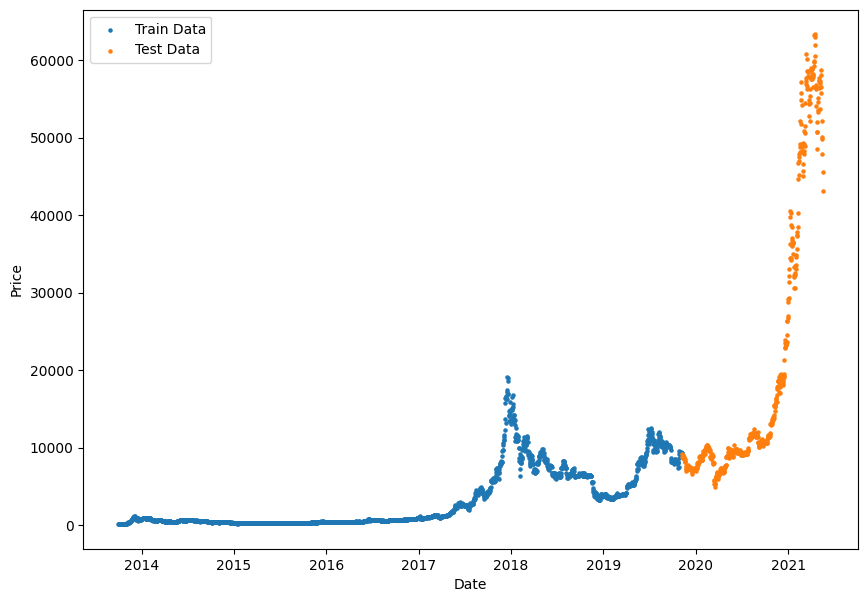

In [ ]:
# Plot correct splits
plt.figure(figsize=(10,7))
plt.scatter(x_train , y_train , s = 5 , label="Train Data")
plt.scatter(x_test , y_test , s = 5 , label="Test Data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### Create a plotting function


In [ ]:
def plot_data(timesteps , values , format="." , start=0 , end=None , label=None):
  """
  Creates a scatter plot from given timesteps and values
  """
  """
  Parameters
  -----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot , default "."
  start: where to start
  end: where to end
  label: label to show on plot
  """
  plt.plot(timesteps[start:end], values[start:end] , format ,label = label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize = 14) #make it bigger
  plt.grid(True)

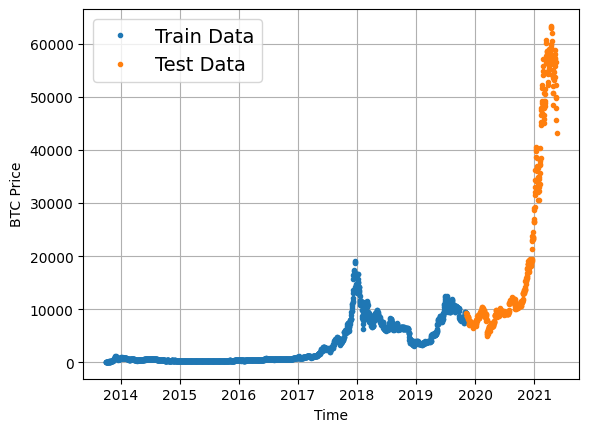

In [ ]:
plot_data(timesteps=x_train , values = y_train , label ="Train Data")
plot_data(timesteps=x_test , values = y_test , label ="Test Data")

## Modelling Experiments

**Horizon** = Number of timesteps into the future we're going to predict

**Window Size** = Number of timesteps we're going to use to predict **Horizon**

Modelling Experiments
* Model 0: Naive Bayes Model
* Model 1 : Dense Model , Horizon =1 , window = 7
* Model 2 : Same as 1 , Horizon =1 , window 30
* Model 3 : Same as 1 , Horizon =7 , window 30
* Model 4 : Conv1D
* Model 5 :LSTM
* Model 6 :same as 1 (multivariate data)
* Model 7 :N-BEATS Algorithm
* Model 8 : Ensemble
* Model 9 : Future Prediction Model
* Model 10: same as 1 but with turkey data introduced

## Model 0: Naive Forecast (Baseline)

The formula looks like this :

$$\hat{y}_{t} = y_{t-1}$$

Which Infers:
> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1



In [ ]:
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [ ]:
# Create a naive forecast

naive_forecast = y_test[:-1]

naive_forecast[:10] , naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

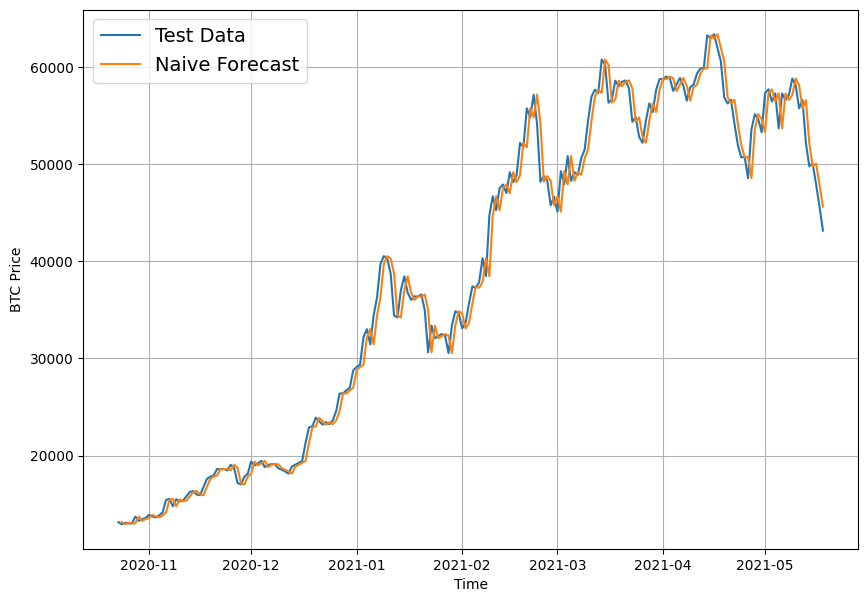

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10 ,7))
#plot_data(timesteps = x_train , values = y_train , label ="Train Data")
plot_data(timesteps = x_test , values = y_test ,start=350, format="-" ,label ="Test Data")
plot_data(timesteps = x_test[1:] , values = naive_forecast ,format="-" , start =350 , label ="Naive Forecast")

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting

We are predicting a number so that means we have a form of a regression problem.

Because we are working with on a regression problem  we'll need some regression metrics.

A few common regression metrics (which can also be used for time series forecasting):
* MAE: mean absolute error
* MSE: mean squared error
* RMSE : Root Mean Squared error

For all of these  **lower is better** , for example , an MAE of 0 that is better than an MAE of 100.


In [ ]:
import tensorflow as tf

In [ ]:
# MASE Implementation
def mean_absolute_scale_error(y_true , y_pred):
  """
  Implements MASE(assuming no seasonality of data)
  """

  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day

  return mae / mae_naive_no_season

In [ ]:
mean_absolute_scale_error(y_true = y_test[1:]  , y_pred = naive_forecast).numpy()

0.9995699939182624

In [ ]:
y_test[0].dtype

dtype('float64')

In [ ]:
# Create a Function to take in model predictions and truth values and return evaluations

def evaluate_preds(y_true , y_pred):
  """
  Make sure float32 datatype(for metric calculations)
  numpy prefers float64
  """

  y_true = tf.cast(y_true , dtype =tf.float32)
  y_pred = tf.cast(y_pred , dtype = tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true , y_pred)
  mse=tf.keras.metrics.mean_squared_error(y_true , y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true , y_pred)
  mase = mean_absolute_scale_error(y_true , y_pred)

  return {"mae" : mae.numpy(),
          "mse" : mse.numpy(),
          "rmse" : rmse.numpy(),
          "mape" : mape.numpy(),
          "mase" :mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred= naive_forecast)

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [ ]:
naive_forecast[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [ ]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>

## Other models you can use for baselines and for actual forecasts

In this section we are focused on TensorFlow and Deep Learning models



## Format Data Part 2: Windowing our Dataset

We window our dataset to turn our data into **Supervised Learning Problem**

```
Windowing for one week
[ 0 , 1 ] -> [2]
[0 , 1 , 2 ] -> [3]
[0 ,1 , 2 , 3] ->[4]
```

In [ ]:
len(y_train)

2229

In [ ]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

In [ ]:
print(f"We want to use :{btc_price[:7]}  to predict this:{btc_price[7]}")

We want to use :[123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795]  to predict this:123.033


In [ ]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


Create a fucnction to create windows and horizons

Our Function will:
1. Create a Window step of specific window size (e.g. [0 ,1 ,2 ,3 ,4 ,5 ,6])
2. Use NumPy indexing to create a 2D array of multiple window steps
3. Uses the 2D array of multiple window steps (from 2) to index on a target series
4. uses `get_labelled_window()` to turn the window steps into windows with specific horizon

In [ ]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horzion on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View first 3 windows and labels

for i in range(3):
  print(f"Window : {full_windows[i]} -> Label {full_labels[i]}")

Window : [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label [123.033]
Window : [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label [124.049]
Window : [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label [125.96116]


In [ ]:
# View last 3 windows and labels

for i in range(3):
  print(f"Window : {full_windows[i-3]} -> Label {full_labels[i-3]}")

Window : [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label [47885.62525472]
Window : [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label [45604.61575361]
Window : [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label [43144.47129086]


## Turing windows into training and test set

In [ ]:
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
# Create train and test windows
train_windows, test_windows ,train_labels , test_labels= make_train_test_splits(full_windows , full_labels)

len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(2224, 556, 2224, 556)

In [ ]:

# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a Modelling Checkpoint

Because our model's performance will fluctuate from experiment
to experiment , we're going to write a model checkpoint so we can compare apples to apples

More specifically ,we want to compare each of our model's best performances against the other model's best performance


In [ ]:
import os
# Create a function to implement a ModelCheckpoint callback with a specific filename

def create_checkpoint(model_name , save_path = "mode_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path , model_name),
                                            verbose = 0,# Only output
                                            save_best_only = True )

## Model 1: Dense Model (Window = 7 , horizon = 1)

Our First Deep Model is going to be a simple dense model:
* A single dense layer with 128 hidden units and Relu
* An output layer with linear activation (no activation)
* Adam Optimizer and MAE loss function
* Batch size of 128
* 100 epochs

* **Hyperparameters** = values a machine learning practitioner (me!) can adjust themselves
* Parameters = values a model learns on it own

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers

# Set random seed
tf.random.set_seed(42)

# Creating model
model_1 = tf.keras.Sequential([
    layers.Dense(128 , activation ="relu"),
    layers.Dense(HORIZON , activation="linear") # No activation
] , name ="model_1_dense")

# Compile the model
model_1.compile(loss ="mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae" , "mse"])
# Fit the model
model_1.fit(train_windows , train_labels ,
            epochs = 100,
            verbose =1 ,
            batch_size =128,
            validation_data = (test_windows , test_labels),
            callbacks=[create_checkpoint(model_name=model_1.name)])



Epoch 1/100
18/18 [==============================] - 2s 52ms/step - loss: 1607.5463 - mae: 1607.5463 - mse: 8271477.0000 - val_loss: 1156.6414 - val_mae: 1156.6414 - val_mse: 4294089.5000
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 343.5127 - mae: 343.5127 - mse: 458249.8125 - val_loss: 1726.5878 - val_mae: 1726.5878 - val_mse: 7126862.5000
Epoch 3/100
18/18 [==============================] - 1s 31ms/step - loss: 219.0598 - mae: 219.0598 - mse: 232119.7344 - val_loss: 1064.6560 - val_mae: 1064.6560 - val_mse: 3364167.7500
Epoch 4/100
18/18 [==============================] - 1s 31ms/step - loss: 175.1000 - mae: 175.1000 - mse: 157580.5156 - val_loss: 950.9861 - val_mae: 950.9861 - val_mse: 2812417.0000
Epoch 5/100
18/18 [==============================] - 1s 30ms/step - loss: 161.9038 - mae: 161.9038 - mse: 141549.7812 - val_loss: 863.6092 - val_mae: 863.6092 - val_mse: 2476590.5000
Epoch 6/100
18/18 [==============================] - 1s 31ms/step - loss: 154

In [ ]:
# Evaluate model on test data

model_1.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 647.6550 - mae: 647.6550 - mse: 1314674.3750


[647.655029296875, 647.655029296875, 1314674.375]

## Making forecasts on the model (on test dataset)

To make "forecasts" on the test datasets aren't actual forecast because actual forecasts are into the future

1. rain the model
2. Takes in some input data
3. passes the input data to the models `predict()` method
4. returns predictions

In [ ]:
def make_preds(model , input_data):
  """
  Uses the model to make predictions input data
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # Return 1-D array

In [ ]:
model_1_preds= make_preds(model_1 , test_windows)
model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8691.636, 8600.604, 8865.4  , 8652.796, 8588.505, 8571.429,
       8549.45 , 8354.07 , 8311.561, 8372.921], dtype=float32)>

In [ ]:
test_labels[:10]

array([[8798.04205463],
       [9081.18687849],
       [8711.53433917],
       [8760.89271814],
       [8749.52059102],
       [8656.97092235],
       [8500.64355816],
       [8469.2608989 ],
       [8537.33965197],
       [8205.80636599]])

In [ ]:
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_1_preds)

In [ ]:
model_1_results

{'mae': 647.6551,
 'mse': 1314674.4,
 'rmse': 1146.5925,
 'mape': 2.979651,
 'mase': 1.1377506}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

NameError: ignored

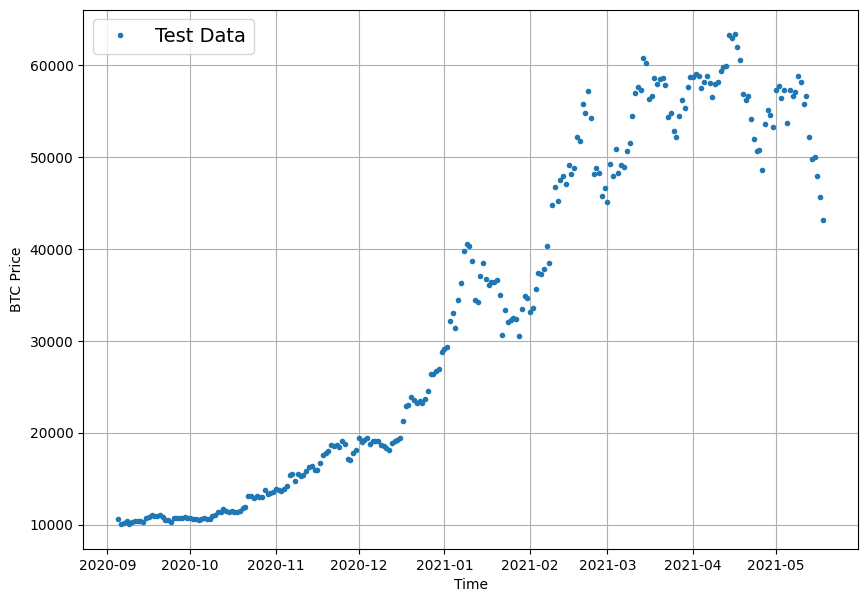

In [ ]:
# Lets plot our model 1 predictions

offset = 300
plt.figure(figsize=(10 ,7))
# Account for test window offset and index into test labels to ensure correct plotting
plot_data(timesteps = x_test[-len(test_windows):],
          values = test_labels[: , 0],
          start=offset,
          label="Test Data")
plot_data(timesteps = x_test[-len(test_windows):],
          values=model_1_preds,
          start=offset,
          format="-",
          label="model_1_preds")

## Model 2: Dense (Window = 30 , Horizon = 1)

In [ ]:
HORIZON = 1 # Predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in past

In [ ]:
full_windows ,full_labels = make_windows(prices , window_size=WINDOW_SIZE , horizon=HORIZON)
len(full_windows) , len(full_labels)

(2757, 2757)

In [ ]:
# Make train and testing windows
train_windows , test_windows , train_labels , test_labels = make_train_test_splits(windows = full_windows,
                                                                                   labels=full_labels,
                                                                                   test_split=0.2)
len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    layers.Dense(128 ,activation="relu"),
    layers.Dense(HORIZON)
] , name="model_2_dense")

# Compile the model
model_2.compile(loss ="mae",
                optimizer = tf.keras.optimizers.Adam(),
                )
# Fit the model
model_2.fit(train_windows , train_labels ,
            epochs = 100,
            verbose =0 ,
            batch_size =128,
            validation_data = (test_windows , test_labels),
            callbacks=[create_checkpoint(model_name=model_2.name)])


NameError: ignored

In [ ]:
# Evaluate model 2
model_2.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 631.9464


631.9463500976562

In [ ]:
model_2_preds = make_preds(model_2 ,
                           input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [ ]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred = model_2_preds)
model_2_results

{'mae': 631.9465,
 'mse': 1296806.2,
 'rmse': 1138.774,
 'mape': 2.9010842,
 'mase': 1.1046485}

In [ ]:
model_1_results

{'mae': 665.6678,
 'mse': 1374130.6,
 'rmse': 1172.2332,
 'mape': 3.0562308,
 'mase': 1.1693939}

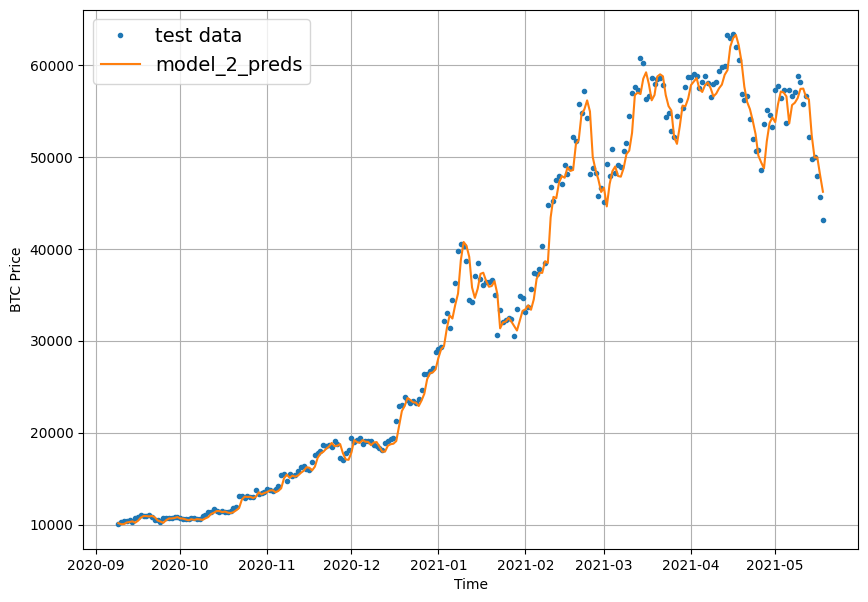

In [ ]:
offset = 300
plt.figure(figsize=(10,7))
plot_data(timesteps=x_test[-len(test_windows):] , values=test_labels[: , 0] , start=offset , label="test data")
plot_data(timesteps=x_test[-len(test_windows):] , values=model_2_preds ,format="-", start=offset , label="model_2_preds")

In [ ]:
## Model 3: Dense (window = 30 , horizon = 7)

In [ ]:
WINDOW_SIZE =30
HORIZON = 7

full_windows , full_labels = make_windows(prices , window_size=WINDOW_SIZE ,horizon=HORIZON)
len(full_windows) , len(full_labels)

(2751, 2751)

In [ ]:
train_windows , test_windows , train_labels , test_labels = train_test_split(full_windows , full_labels , test_size=0.2)
len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
# Creating model (same as model 1 but with different data input and output sizes)

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128 , activation="relu"),
    layers.Dense(HORIZON)
] , name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())
model_3.fit(train_windows,
            train_labels,
            epochs =100,
            verbose =0,
            validation_data=(test_windows , test_labels),
            )

In [ ]:
model_3.evaluate(test_windows , test_labels)


18/18 [==============================] - 0s 2ms/step - loss: 423.7986


423.7986145019531

In [ ]:
model_3_preds = make_preds(model_3 , input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[ 7298.071  ,  7399.163  ,  7286.2236 ,  7438.3022 ,  7266.8975 ,
         7229.988  ,  7369.08   ],
       [ 1084.5303 ,  1077.5273 ,  1047.0027 ,  1041.285  ,   960.0069 ,
          972.504  ,   890.72174],
       [10814.326  , 11032.467  , 10919.893  , 11174.967  , 10822.504  ,
        10833.64   , 11005.591  ],
       [  574.69604,   582.2062 ,   578.2769 ,   587.90717,   571.5889 ,
          566.804  ,   570.4728 ],
       [  756.50366,   764.3989 ,   758.9621 ,   768.68756,   748.1093 ,
          751.64874,   760.3615 ]], dtype=float32)>

In [ ]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([1.44844452e+02, 1.46769562e+02, 4.93813324e+02, 5.52232122e+00,
        8.96496582e+00, 6.73407776e+02, 2.62826172e+02, 1.02951527e+01,
        1.39826501e+03, 2.07414970e+01, 2.11114575e+03, 1.73718185e+02,
        4.68696213e+01, 2.64353668e+02, 2.69385643e+01, 3.20898628e+01,
        2.40973657e+03, 2.84450378e+01, 4.20911331e+01, 5.55571716e+02,
        4.43981934e+02, 7.28465869e+03, 1.49621716e+01, 8.48445320e+00,
        1.88176132e+02, 4.55734802e+02, 1.49274340e+01, 3.57074921e+02,
        1.19118126e+02, 1.62246368e+02, 2.55127335e+02, 2.67834534e+02,
        5.77850684e+03, 1.66456394e+01, 7.00222349e+00, 1.99817371e+01,
        3.96848083e+02, 3.38938629e+02, 1.36000624e+01, 3.34358597e+01,
        6.07645941e+00, 6.39705133e+00, 1.00354223e+01, 3.04995117e+03,
        5.76395321e+00, 3.06927094e+02, 2.39712181e+01, 1.20432787e+01,
        1.72258386e+03, 2.17962036e+01, 1.40631616e+03, 2.06167065e+03,
        3.57527590e+00, 5.02636993e+02, 7.97184086e+00, 1

## Make our evaluation function work for larger horizon

In [ ]:
# Create a Function to take in model predictions and truth values and return evaluations

def evaluate_preds(y_true , y_pred):
  """
  Make sure float32 datatype(for metric calculations)
  numpy prefers float64
  """

  y_true = tf.cast(y_true , dtype =tf.float32)
  y_pred = tf.cast(y_pred , dtype = tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true , y_pred)
  mse=tf.keras.metrics.mean_squared_error(y_true , y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true , y_pred)
  mase = mean_absolute_scale_error(y_true , y_pred)

  # Account for different sized metrics (for longer horizons , we are to reduce metrics to a single value)
  if mae.ndim>0:
    mae=tf.reduce_mean(mae)
    mse=tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae" : mae.numpy(),
          "mse" : mse.numpy(),
          "rmse" : rmse.numpy(),
          "mape" : mape.numpy(),
          "mase" :mase.numpy()}

In [ ]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 423.79855,
 'mse': 1150612.8,
 'rmse': 487.565,
 'mape': 6.0636973,
 'mase': 0.046699278}

Visualizing the predictions

In [ ]:
test_labels[:5]

array([[ 7251.27679432,  7179.95781929,  7174.74401195,  6955.48757967,
         7291.21950532,  7337.63667014,  7347.43326444],
       [ 1004.61633   ,   759.43041   ,   689.81      ,   841.83966   ,
          916.77599   ,   967.42866   ,   866.29003   ],
       [11360.85271687, 11334.02674203, 11666.21170032, 11443.73279182,
        11395.54736637, 11504.54900671, 11355.16043945],
       [  577.98749   ,   574.5825    ,   575.0625    ,   575.3425    ,
          568.78875   ,   574.49749   ,   571.94125   ],
       [  754.82625   ,   758.35375   ,   763.23625   ,   766.8725    ,
          773.2825    ,   765.9525    ,   769.8275    ]])

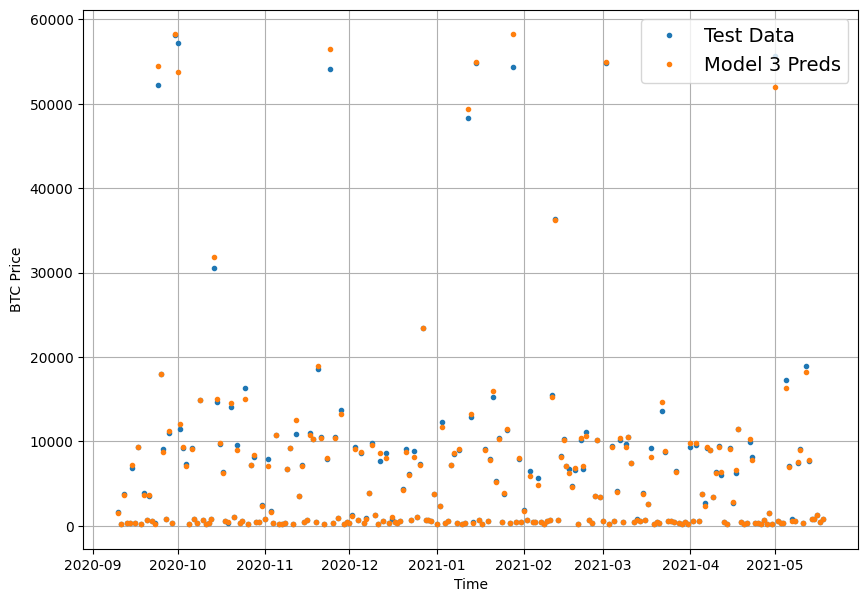

In [ ]:
offset = 300
plt.figure(figsize=(10 ,7))
plot_data(timesteps = x_test[-len(test_windows):], values = test_labels[: ,0] , start = offset , label="Test Data")
plot_data(timesteps = x_test[-len(test_windows):], values = tf.reduce_mean(model_3_preds , axis = 1), start = offset , label="Model 3 Preds")

In [ ]:
model_3_preds[0]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([7298.071 , 7399.163 , 7286.2236, 7438.3022, 7266.8975, 7229.988 ,
       7369.08  ], dtype=float32)>

In [ ]:
tf.reduce_mean(model_3_preds[0])

<tf.Tensor: shape=(), dtype=float32, numpy=7326.818>

## Performance Comparision

<Axes: >

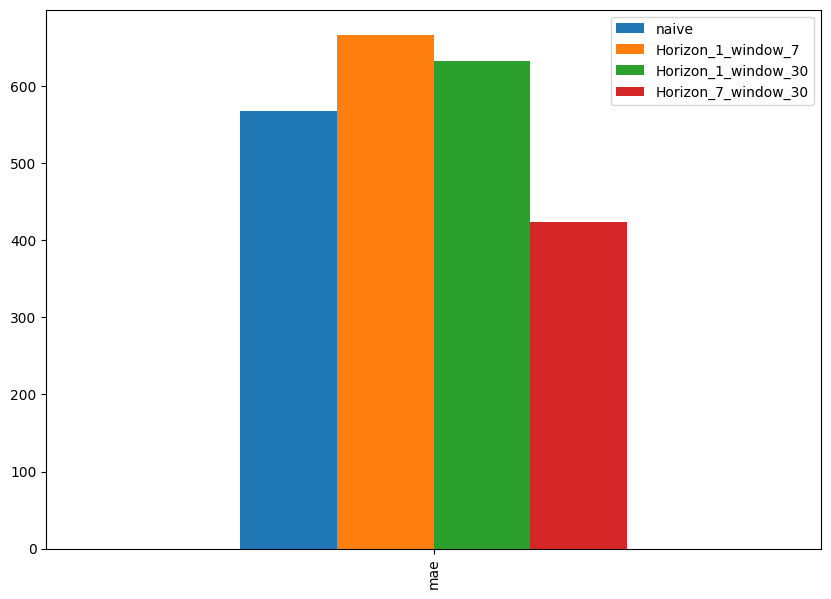

In [ ]:
pd.DataFrame({"naive":naive_results["mae"],
              "Horizon_1_window_7":model_1_results["mae"],
              "Horizon_1_window_30":model_2_results["mae"],
              "Horizon_7_window_30" :model_3_results["mae"]}, index=["mae"]).plot(figsize=(10,7),kind="bar")

## Model 4: Conv1D

In [ ]:
HORIZON = 1 # Predict next day of bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data

In [ ]:
# Create windowed data
full_windows , full_labels = make_windows(prices , window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows) , len(full_labels)

(2780, 2780)

In [ ]:
# Create train and / test sets
train_windows , test_windows , train_labels , test_labels  = make_train_test_splits(full_windows , full_labels)
len(train_windows) , len(train_labels) , len(test_windows) , len(test_labels)

(2224, 2224, 556, 556)

We need an input shape of :`(batch_size , timesteps , input_dim)`

In [ ]:
train_windows[0].shape # (Window size ,)

(7,)

In [ ]:
# Before we pass our data to Conv1D layer we need to reshape the data

x = tf.constant(train_windows[0])
x


<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x : tf.expand_dims(x , axis = 1)) # add an extra dimension for `input_dim`
expand_dims_layer

In [ ]:
print(f"Original Shape: {x.shape}")
print(f"Expanded Shape:{expand_dims_layer(x).shape}")
print(f"Original Values with expanded shape:\n{expand_dims_layer(x)}")

Original Shape: (7,)
Expanded Shape:(7, 1)
Original Values with expanded shape:
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
# Creating a Conv1D model

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x , axis =1)),
    layers.Conv1D(filters =128 ,
                  kernel_size = 5,
                  strides=1,
                  padding="causal",
                  activation="relu"),
    layers.Dense(HORIZON)
], name="MODEL_4_CONV1D")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            #verbose=0,
            validation_data=(test_windows , test_labels),
            )

Epoch 1/100
18/18 [==============================] - 2s 48ms/step - loss: 2020.2345 - val_loss: 3541.5413
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 332.7678 - val_loss: 1130.6088
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 218.4682 - val_loss: 1088.8289
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 196.3891 - val_loss: 1074.5657
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 191.0257 - val_loss: 1061.3152
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 190.9948 - val_loss: 1069.5135
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 190.2996 - val_loss: 1033.6202
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 183.4677 - val_loss: 1032.4836
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 181.0431 - val_loss: 1054.0885
Epoch 10/100
18/18 [==============================] - 0s 6ms/s

In [ ]:
len(train_windows)

2224

In [ ]:
len(train_labels)

2224

In [ ]:
model_4.summary()

Model: "MODEL_4_CONV1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_4.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 650.8207


650.8206787109375

In [ ]:
model_4_preds = make_preds(model_4 , test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8737.948, 8638.585, 8849.398, 8643.813, 8607.96 , 8595.319,
       8532.86 , 8402.657, 8318.865, 8378.667], dtype=float32)>

In [ ]:
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred =model_4_preds)
model_4_results

{'mae': 650.82074,
 'mse': 1339950.2,
 'rmse': 1157.5623,
 'mape': 2.9811044,
 'mase': 1.1433117}

## Model 5: RNN(LSTM)

In [ ]:
tf.random.set_seed(42)

# Building a LSTM model using functional API
inputs = layers.Input(shape =(WINDOW_SIZE))
x = layers.Lambda(lambda x : tf.expand_dims(x ,axis =1))(inputs)
x = layers.LSTM(128 , return_sequences = True , activation="relu")(x)
x = layers.LSTM(128 , activation="relu")(x)
x = layers.Dense(32 ,activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs = inputs , outputs = outputs , name ="model_5_LSTM")

# Compile
model_5.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows ,
            train_labels,
            epochs=100,
            verbose = 1,
            batch_size=128,
            validation_data=(test_windows , test_labels))


Epoch 1/100
18/18 [==============================] - 4s 57ms/step - loss: 2828.5645 - val_loss: 13921.6133
Epoch 2/100
18/18 [==============================] - 0s 24ms/step - loss: 1086.3026 - val_loss: 3022.8804
Epoch 3/100
18/18 [==============================] - 0s 22ms/step - loss: 266.4855 - val_loss: 1192.6394
Epoch 4/100
18/18 [==============================] - 0s 14ms/step - loss: 189.7274 - val_loss: 996.9446
Epoch 5/100
18/18 [==============================] - 0s 14ms/step - loss: 187.3231 - val_loss: 1035.7345
Epoch 6/100
18/18 [==============================] - 0s 14ms/step - loss: 183.3074 - val_loss: 985.4932
Epoch 7/100
18/18 [==============================] - 0s 13ms/step - loss: 176.4258 - val_loss: 987.1218
Epoch 8/100
18/18 [==============================] - 0s 13ms/step - loss: 174.1867 - val_loss: 968.4407
Epoch 9/100
18/18 [==============================] - 0s 13ms/step - loss: 174.9378 - val_loss: 985.4069
Epoch 10/100
18/18 [==============================] - 0s 

In [ ]:
model_5.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 580.6188


580.6188354492188

In [ ]:
model_5_preds =make_preds(model_5 , test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8841.555, 8772.193, 9146.162, 8778.892, 8737.059], dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred=model_5_preds)

In [ ]:
model_5_results

{'mae': 580.61884,
 'mse': 1201316.1,
 'rmse': 1096.0457,
 'mape': 2.5902386,
 'mase': 1.0199865}

In [ ]:
model_1_results

{'mae': 665.6678,
 'mse': 1374130.6,
 'rmse': 1172.2332,
 'mape': 3.0562308,
 'mase': 1.1693939}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

## Make a multivariate time series dataset



In [ ]:
# Lets make a multivariate timeseries data

bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
#Lets add the bitcoin halving events to our dataset

block_reward_1 =50
block_reward_2 =25
block_reward_3 =12.5
block_reward_4 =6.25

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
# Create date ranges of where specific block reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days , block_reward_3_days

(1012, 2421)

In [ ]:
# Add in a block_reward column

bitcoin_price_block = bitcoin_prices.copy()
bitcoin_price_block["block_reward"] = None

# Add in block_reward values as feature of dataframe
bitcoin_price_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_price_block.iloc[:block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_price_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_price_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,12.5
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


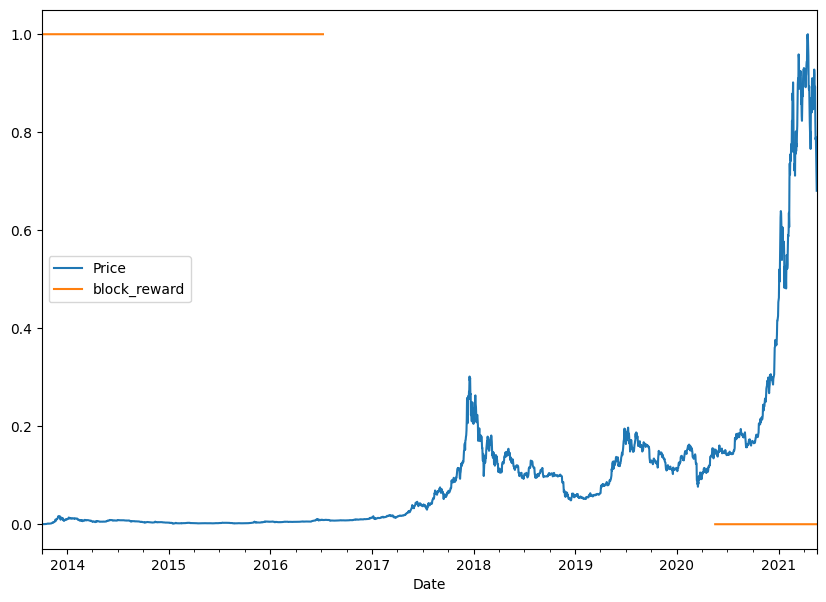

In [ ]:
# Plot the block reward vs time over time

from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_price_block[["Price" , "block_reward"]]),
                                                                    columns = bitcoin_price_block.columns,
                                                                    index=bitcoin_price_block.index)
scaled_price_block_df.plot(figsize=(10 , 7));

## Making a windowed dataset with pandas

Previously we have turned our univariate time series into windowed dataset using above helper functions

We can use `pandas.DataFrame.shift()` to do so


In [ ]:
# Set dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a cpoy of bitcoin historical data with block rewards feature

bitcoin_prices_windowed = bitcoin_price_block.copy()

# Add windowed column

for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
len(bitcoin_prices_windowed)

2787

We have created a way to winoow a dataset directly from pandas dataframe

```
[0 , 1 ,2 , 3, 4, 5 ,6 , block_reward] -> [7]
[1 ,2 , 3, 4, 5 ,6 ,7 ,  block_reward] -> [8]
[2 , 3, 4, 5 ,6 , 7 ,8  ,block_reward] -> [9]
 ```

In [ ]:
# Create X (windows) and y (horizons) features
x = bitcoin_prices_windowed.dropna().drop("Price" , axis = 1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

x.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
# Make train and test sets

split_size = int(len(x)*0.8)

x_train , y_train = x[:split_size] , y[:split_size]
x_test , y_test = x[split_size:] , y[split_size:]

len(x_train) , len(y_train) , len(x_test) , len(y_test)

(1096, 1096, 275, 275)

# Model 6: Dense (multivariate time series)

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# making a mutivariate time series model

model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
] , name ="multivariate_model_6")

# Compile the model

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit the model
model_6.fit(x_train , y_train,
            epochs=100,
            batch_size =128,
            verbose =1,
            validation_data=(x_test ,y_test))

Epoch 1/100
9/9 [==============================] - 1s 25ms/step - loss: 386.0316 - val_loss: 5607.3594
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 133.0387 - val_loss: 2946.9966
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 74.7029 - val_loss: 2167.5564
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 55.9908 - val_loss: 1413.1542
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 38.6026 - val_loss: 1700.5967
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 37.7402 - val_loss: 1345.0996
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 33.6646 - val_loss: 1297.8689
Epoch 8/100
9/9 [==============================] - 0s 11ms/step - loss: 35.0095 - val_loss: 1237.8557
Epoch 9/100
9/9 [==============================] - 0s 6ms/step - loss: 35.7818 - val_loss: 1378.5736
Epoch 10/100
9/9 [==============================] - 0s 10ms/step - loss: 41.0363 - val_

In [ ]:
model_6.evaluate(x_test , y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1029.5507


1029.5506591796875

In [ ]:
model_6_preds = tf.squeeze(model_6.predict(x_test))

9/9 [==============================] - 0s 2ms/step


In [ ]:
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([11820.152, 11938.488, 12250.944, 12190.047, 11874.061, 11874.818,
       11713.02 , 11587.886, 11647.947, 11705.092], dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(y_true = y_test,
                                 y_pred=model_6_preds)

model_6_results

{'mae': 1029.5505,
 'mse': 2571444.5,
 'rmse': 1603.5724,
 'mape': 2.9554472,
 'mase': 1.0759363}

N - BEATS Algorithm :https://arxiv.org/abs/1905.10437

## Model 7: N-BEATS Algorithm

Biggest timeseries forecasting model

More Specifically we will be replicated the algorithm in the following paper : https://arxiv.org/abs/1905.10437

### Building and testing  the N-BEATS block layer

N-BEATS block layer doesn't exist we have to create it.

To create custom layers and models in TensorFlow we can use subclassing
https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [ ]:
# Create NBeatBlock custom layer

class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size:int,
               theta_size:int,
               horizon:int,
               n_neurons:int,
               n_layers:int,
               **kwargs):     #Takes care all arguments for the parent class

    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size=theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of four fully connected layers each had ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons , activation="relu") for _ in range(n_layers)]

    # output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size , activation ="linear" , name="theta_layer")

  def call(self , inputs):
    x =inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output backcast and forecast from the theta
    backcast , forecast = theta[: , :self.input_size] , theta[: , -self.horizon:]
    return backcast,forecast

Let's test our class

In [ ]:
# Set up dummy inputs and outputs

dummy_layer = NBeatsBlock(input_size = WINDOW_SIZE,
                           theta_size=WINDOW_SIZE+HORIZON,
                           horizon=HORIZON,
                           n_neurons=128,
                           n_layers = 4)

In [ ]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+ 1 ,axis =0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Passing inputs and outputs
backcast , forecast = dummy_layer(dummy_inputs)

# These are activation outputs of the layer
print(f"Backcast:{tf.squeeze(backcast.numpy())}")
print(f"Forecast:{tf.squeeze(forecast.numpy())}")

NameError: ignored

### Preparing Data for the N-BEATS algorithm using `tf.data`



In [ ]:
HORIZON = 1
WINDOW_SIZE =7

In [ ]:
# Create NBEATS data input (univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Make Features and Labels

x= bitcoin_prices_nbeats.dropna().drop("Price" , axis = 1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make Train and Test sets

split_size = int(len(x) * 0.8)
x_train , y_train  =x[:split_size] , y[:split_size]
x_test , y_test = x[split_size:] , y[split_size:]

len(x_train) ,len(y_train) , len(x_test) ,len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# Time to make our dataset performant using tf.data API

train_features_dataset = tf.data.Dataset.from_tensor_slices(x_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(x_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together

train_dataset =tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset =tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetching our datasets
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset , test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm


In [ ]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30
INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE+HORIZON

INPUT_SIZE , THETA_SIZE

(7, 8)

### Getting ready for residual connections

Before building our NBEATS model we need 2 more layer to add and subtract

NBEATS algorithm uses double residual stacking to help train its deeper architecture

In [ ]:
# Make tensors
tensor_1 = tf.range(10)+10
tensor_2 = tf.range(10)

#Subtract
subtracted = layers.subtract([tensor_1 , tensor_2])

# Add
added = layers.add([tensor_1 , tensor_2])

added , subtracted


(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>)

In [ ]:
tensor_1 , tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

### Building ,Compiling and fitting the N-BEATS algorithm

1. Setup an instance of NBEATS block layer using
`NBeatsBlock` (Initial Block and rest will be created as part of stacks)

2. Create an input layer for N-BEATS stack ( we'll be using the Functional API)

3. Make the initial backcast and forecast for the model with the layer created in (1)

4. Use the loop to create stacks of block layers

5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks with return backcasts and block-level forecasts

6. Create double residual stacking using subtract and add layers

7. Put the inputs and outputs together

8. compile with MAE loss

9. Fit for 5000 epochs


In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass in the residuals

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8. Compile model with MAE loss
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


P.S run the model with GPU skiping for now

In [ ]:
# Evaluate N-Beats model on the test dataset
model_7.evaluate(test_dataset)

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7 , test_dataset)
model_7_preds[:10]

In [ ]:
# Evaluate N-Beats Model
model_7_results = evaluate_preds(y_true = y_test ,
                                 y_pred=model_7_preds)
model_7_results

In [ ]:
### Plotting the N-BEATS architecture we have been created
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating ensemble (stacking different models together)

An Emsemble leverages the wisdom of the crowd effect

it combines many models to predict a common goal

In [ ]:
HORIZON , WINDOW_SIZE

(1, 7)

In [ ]:
### Constructing and fitting ensemble model (using different loss functions)

def get_ensemble_models(horizon = HORIZON,
                        train_data =train_dataset,
                        test_data=test_dataset,
                        num_iter = 10,
                        num_epochs=1000,
                        loss_fn=["mae" , "mse" ,"mape"]):

  """
  Returns a list of num_iter models each trained on mae , mse , mape loss
  """
  # Make empty list for trained ensemble models
  ensemble_models=[]

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fn:
      print(f"Optimizing model by reducing:{loss_function} for {num_epochs} epochs , model number:{i}")

      # Construct a simple model (similar to model_1)

      model = tf.keras.Sequential([
          #Initialize dense layers with normal distributions for estimating prediction intervals later on
          layers.Dense(128 ,kernel_initializer="he_normal",activation ="relu"),
          layers.Dense(128 ,kernel_initializer="he_normal", activation="relu"),
          layers.Dense(HORIZON)
      ])

      # Compile the model
      model.compile(loss = loss_function,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics=["mae" , "mse"])

      # Fit the current model
      model.fit(train_data,
                epochs = num_epochs,
                verbose =0,
                validation_data = test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience =200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      #Append fitted model to list of ensemble models
      ensemble_models.append(model)

    return ensemble_models




In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import layers

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models =get_ensemble_models(num_iter = 5,
                                     num_epochs = 1000)

Optimizing model by reducing:mae for 1000 epochs , model number:0

Epoch 755: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing:mse for 1000 epochs , model number:0

Epoch 372: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 472: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing:mape for 1000 epochs , model number:0

Epoch 113: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 382: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 563: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 663: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
CPU times: user 1min 36s, sys: 3.71 s, total: 1min 39s
Wall time: 1min 57s


## Make Predictions with our ensemble model

In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions

def make_ensemble_preds(ensemble_models , data):
  ensemble_preds =[]
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))


In [ ]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 78ms/step
CPU times: user 489 ms, sys: 38.9 ms, total: 528 ms
Wall time: 37.7 s


<tf.Tensor: shape=(3, 556), dtype=float32, numpy=
array([[ 8794.318 ,  8777.314 ,  9081.317 , ..., 49966.64  , 48643.77  ,
        46179.84  ],
       [ 8692.97  ,  8815.3125,  9068.    , ..., 50527.914 , 47672.984 ,
        46015.6   ],
       [ 8821.88  ,  8798.704 ,  9063.241 , ..., 49898.29  , 48388.113 ,
        46130.32  ]], dtype=float32)>

In [ ]:
y_test

Date
2019-11-10     8798.042055
2019-11-11     9081.186878
2019-11-12     8711.534339
2019-11-13     8760.892718
2019-11-14     8749.520591
                  ...     
2021-05-14    49764.132082
2021-05-15    50032.693137
2021-05-16    47885.625255
2021-05-17    45604.615754
2021-05-18    43144.471291
Name: Price, Length: 556, dtype: float64

In [ ]:
ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = ensemble_preds)
ensemble_results

{'mae': array([580.0779 , 588.59186, 572.70154], dtype=float32),
 'mse': array([1182764.4, 1182411.2, 1172559.2], dtype=float32),
 'rmse': array([1087.5497, 1087.3873, 1082.8478], dtype=float32),
 'mape': array([2.6169233, 2.6763852, 2.5928378], dtype=float32),
 'mase': 1.0197022}

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds , axis = 0)

In [ ]:
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8769.723, 8797.11 , 9070.853, 8714.541, 8727.801, 8699.237,
       8644.996, 8488.261, 8442.679, 8522.583], dtype=float32)>

In [ ]:
ensemble_median = np.median(ensemble_preds , axis = 0)
ensemble_median[:10]

array([8794.318, 8798.704, 9068.   , 8716.871, 8735.333, 8704.035,
       8654.073, 8488.41 , 8446.023, 8531.221], dtype=float32)

In [ ]:
ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = ensemble_median)
ensemble_results

{'mae': 575.13947,
 'mse': 1157213.9,
 'rmse': 1075.7388,
 'mape': 2.5939734,
 'mase': 1.0103607}

### Plot the predictions intervals (uncertainity estimates) of our ensemble model

So far we've been making point predictions with our models.
E.g horizon = 1, our model predicts tomorrow's price of Bitcoin will be $50,000USD

Instead of 50,000USD on dot , how about 48,000 to 52,000USD that is a range where our prediction came from

One way to get 95% confidence prediction intervals for a deep learning model is the bootstrap method:

1. Take random predictions
2. Measure Standard deviations
3. Multiply the standard deviation by 1.96
4. To get the interval upper and lower bounds , add and subtract the value obtained in (3) to the mean/median of predictions made in (1)

In [ ]:
# Find the upper and lower bounds of ensemble predictions
def get_upper_lower(preds): #1. Take predictions from a number of randomly initialized model

  #2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds , axis = 0)

  # 3. Multiply the standard deviations by 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds , axis = 0)
  lower , upper = preds_mean - interval , preds_mean + interval

  return lower , upper

In [ ]:
# Get the upper and lower bounds of the 95% percent prediction interval

lower , upper = get_upper_lower(preds=ensemble_preds)
lower ,upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8661.087 ,  8766.625 ,  9055.857 ,  8644.528 ,  8691.935 ,
         8613.253 ,  8561.631 ,  8461.374 ,  8379.51  ,  8491.715 ,
         8135.243 ,  8075.2246,  8041.533 ,  7541.497 ,  7265.914 ,
         7288.3823,  7027.283 ,  7158.8267,  7086.8184,  7406.082 ,
         7330.79  ,  7744.2827,  7521.6763,  7384.426 ,  7299.0547,
         7231.9575,  7189.71  ,  7367.3496,  7397.626 ,  7503.6514,
         7524.258 ,  7323.3027,  7205.671 ,  7177.389 ,  7184.8535,
         7216.7007,  7004.7524,  7057.795 ,  6811.7485,  6533.9375,
         7369.511 ,  6967.6   ,  7104.2524,  7216.0967,  7231.002 ,
         7143.867 ,  7139.6436,  7152.772 ,  7120.982 ,  7144.394 ,
         7251.558 ,  7352.453 ,  7216.272 ,  7143.7363,  7103.8105,
         6914.3184,  7258.0073,  7199.1387,  7325.1167,  7650.923 ,
         8105.323 ,  8107.19  ,  7782.4707,  8060.809 ,  8096.825 ,
         8135.985 ,  8069.256 ,  8764.943 ,  8898.164 ,  8716.606 ,

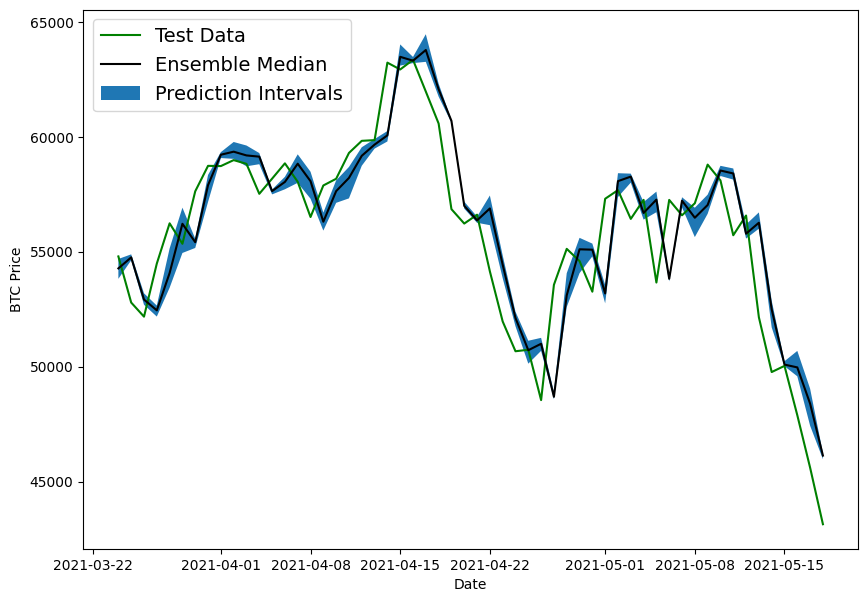

In [ ]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds , axis = 0)

# Plot the median of our ensemble preds along with prediction intervals
offset = 500
plt.figure(figsize=(10 ,7))
plt.plot(x_test.index[offset:], y_test[offset:] , "g" , label="Test Data")
plt.plot(x_test.index[offset:], ensemble_median[offset:] , "k-" , label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(x_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:] , label="Prediction Intervals")
plt.legend(loc="upper left" ,  fontsize=14);

## Model 9: Train a model on the full historical data to make predictions into the future

So Far all of our models have predicted on the test dataset. , this is only psuedofuture , we're building an model to predict the actual bitcoin price in the future

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [ ]:
# Train model on entire data to make predictions for the next day
x_all = bitcoin_prices_windowed.dropna().drop(["Price" , "block_reward"] , axis = 1).to_numpy()

# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(x_all) , len(y_all)

(1371, 1371)

In [ ]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(x_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all , labels_dataset_all))

# Batch and prefetch for optimal performance

BATCH_SIZE = 1024

dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
HORIZON , WINDOW_SIZE

(1, 7)

In [ ]:
tf.random.set_seed(42)
# Building a model

model_9 = tf.keras.Sequential([
    layers.Dense(128 , activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
])

#Model compile
model_9.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fitting model

model_9.fit(dataset_all,
            epochs=100,
            verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 3891.7778
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 2552.0999
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 1165.5887
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 561.9410
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 1139.5042
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 1207.2327
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 873.8359
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 504.8465
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 601.6821
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 764.7654
Epoch 11/100
2/2 [==============================] - 0s 9ms/step - loss: 735.7720
Epoch 12/100
2/2 [==============================] - 0s 13ms/step - loss: 559.6628
Epoch 13/100
2/2 [==========

### Make predictions into Future

In [ ]:
# How many time steps tp predict into future

INTO_FUTURE = 14

To make predictions into future we want a function which:
1. Takes an input:
 * a list of values
 * a trained model
 * a window into future
 * window size a model was trained on

2. Creates an empty list for future forecasts
3. Loop into future making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the lastest prediction

In [ ]:
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.

  Returns future forecasts as a list of floats.
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE numer of predictions, altering the data which gets predicted on each
  for _ in range(INTO_FUTURE):
    # Predict on the last window then append it again, again, again (our model will eventually start to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast


In [ ]:

# Make forecasts into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 71ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55098.984375

1/1 [==============================] - 0s 45ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55098.984375  ] -> Prediction: 50809.66796875

1/1 [==============================] - 0s 47ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55098.984375   50809.66796875] -> Prediction: 50898.98828125

1/1 [==============================] - 0s 37ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55098.984375   50809.66796875 50898.98828125] -> Prediction: 48359.984375

1/1 [==============================] - 0s 42ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55098.984375
 50809.66796875 50898.98828125 48359.984375  ] ->

In [ ]:
type(future_forecasts)

list

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date



In [ ]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep


Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
# Insert last timestep/final price into next time steps and future forecasts so the plot doesn't look janky
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast


(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55098.984, 50809.668, 50898.99 , 48359.984, 45362.33 ,
        46261.52 , 48784.25 , 54108.496, 50859.234, 49617.74 , 46306.586,
        45687.527, 48689.207, 51641.113], dtype=float32))

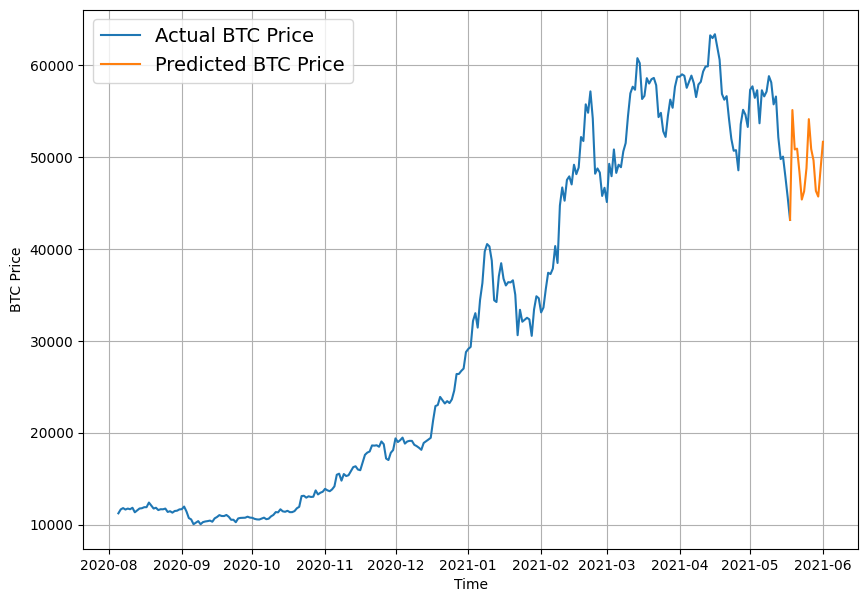

In [ ]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_data(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_data(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Model 10: Why forecasting is BS

### Introducing turkey problem (Price of BTC falls 100x)

In [ ]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] /100


In [ ]:
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
btc_price[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 43144.4712908603]

In [ ]:
timesteps_turkey = np.array(bitcoin_prices.index)
timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

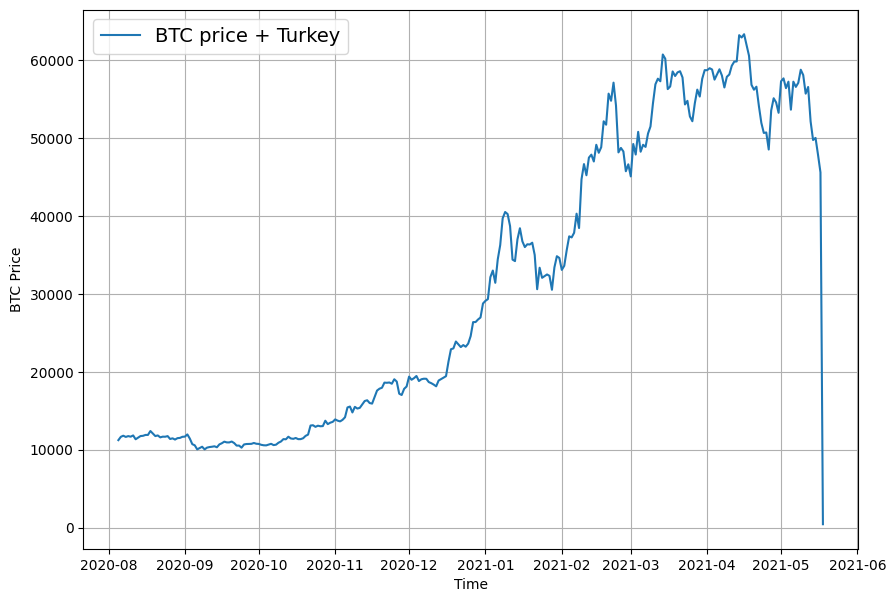

In [ ]:
plt.figure(figsize=(10 ,7))
plot_data(timesteps = timesteps_turkey,
          values=btc_price_turkey,
          format="-",
          label="BTC price + Turkey",
          start=2500)

In [ ]:
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)


(2224, 556, 2224, 556)

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test))

In [ ]:
turkey_model.evaluate(x_test , y_test)

18/18 [==============================] - 0s 3ms/step - loss: 1870.8376


1870.837646484375

In [ ]:
turkey_preds = make_preds(turkey_model , x_test)
turkey_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([9129.55 , 9079.411, 9204.503, 9213.382, 9212.993, 9001.87 ,
       8654.28 , 8719.772, 8887.049, 8578.812], dtype=float32)>

In [ ]:
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

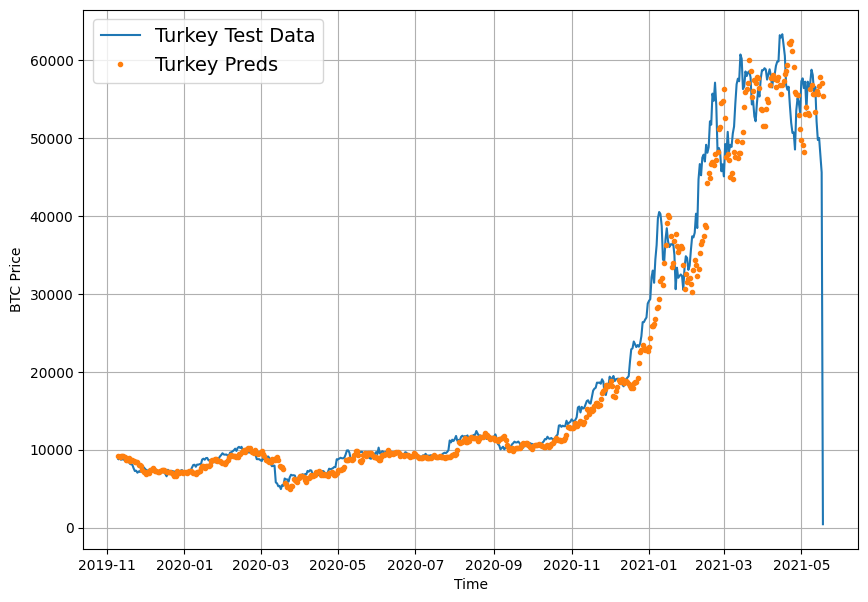

In [ ]:
# Plot

plt.figure(figsize=(10, 7))
offset=0
plot_data(timesteps=timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data",
                 start=offset)
plot_data(timesteps=timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);
